# Tarea DT GNB

Utilizando el Taller 5.2 - Crímenes en New York entre 2005-2016, determinar qué parámetro es mejor utilizar Gini o Entropía, para determinar el número máximo de profundidad con el cual el promedio de exactitud suele ser mayor. (Usted debe escoger la variable objetivo que le parezca adecuada)

In [55]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import check_call

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## Carga, limpieza y exploración de datos

In [56]:
# Cargar datos
dataset = pd.read_csv("Taller5_2_Modificada.csv")
dataset

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,736216184,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,369976063,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,953712078,09/22/2016,15:00:00,NaN,NaN,09/30/2016,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",...,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,596153576,09/22/2016,14:50:00,09/22/2016,15:00:00,09/30/2016,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,160093234,09/22/2016,12:23:00,NaN,NaN,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",...,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,407213974,09/22/2016,11:40:00,09/22/2016,11:50:00,09/30/2016,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


In [57]:
print("Dimensiones del dataset:", dataset.shape)

Dimensiones del dataset: (1104, 24)


Como podemos ver en el dataset, nos encontramos con un dataset acerca de los crímenes en New York entre 2005-2016, el cual cuenta con 1104 registros y 24 columnas, que resultan ser información de los casos. De estas, en principio podemos tomar 3 posibles variables objetivo, que procederemos a analizar para tomar una decisión. En principio tenemos la columna "OFNS_DESC", que nos indica la descripción del delito, la columna "LAW_CAT_CD" que nos indica en nivel de la ofensa y la columna "BORO_NM" que nos indica el nombre del distrito. A continuación, procederemos a analizar cada una de estas variables para determinar cuál es la más adecuada para nuestro análisis.

In [58]:
# Explorar columnas
dataset.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [59]:
# Explorar valores únicos de las posibles columnas objetivo
# Imprimimos la cantidad de valores únicos de cada columna
print("OFNS_DESC: ", dataset["OFNS_DESC"].nunique())
print(dataset["OFNS_DESC"].unique())

OFNS_DESC:  33
['DANGEROUS WEAPONS' 'ASSAULT 3 & RELATED OFFENSES' 'DANGEROUS DRUGS'
 'HARRASSMENT 2' 'ROBBERY' 'CRIMINAL MISCHIEF & RELATED OF'
 'MISCELLANEOUS PENAL LAW' 'PETIT LARCENY' 'FELONY ASSAULT'
 'OFFENSES AGAINST PUBLIC ADMINI' 'SEX CRIMES' 'FORGERY'
 'VEHICLE AND TRAFFIC LAWS' 'NYS LAWS-UNCLASSIFIED FELONY' 'THEFT-FRAUD'
 'OFF. AGNST PUB ORD SENSBLTY &' 'THEFT OF SERVICES' 'GRAND LARCENY'
 'INTOXICATED & IMPAIRED DRIVING' 'CRIMINAL TRESPASS'
 'OFFENSES AGAINST THE PERSON' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'GRAND LARCENY OF MOTOR VEHICLE' 'BURGLARY'
 'POSSESSION OF STOLEN PROPERTY' 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED'
 'OTHER OFFENSES RELATED TO THEF' 'OFFENSES INVOLVING FRAUD'
 'ADMINISTRATIVE CODE' 'RAPE' 'FRAUDS' 'UNAUTHORIZED USE OF A VEHICLE'
 'OTHER STATE LAWS (NON PENAL LA']


In [60]:
print("LAW_CAT_CD: ", dataset["LAW_CAT_CD"].nunique())
print(dataset["LAW_CAT_CD"].unique())

LAW_CAT_CD:  3
['MISDEMEANOR' 'FELONY' 'VIOLATION']


In [61]:
print("BORO_NM: ", dataset["BORO_NM"].nunique())
print(dataset["BORO_NM"].unique())

BORO_NM:  5
['BRONX' 'BROOKLYN' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND']


En un análisis de la situación, y colocando un poco en contexto la situación, podemos ver que la primera posibilidad es directamente inviable, resulta ser más descriptiva que cualquier otra cosa. Las otras dos variables tienen valores únicos un poco más razonables, aunque dado el contexto, la variable "LAW_CAT_CD" resulta ser la más adecuada para nuestro análisis, ya que nos indica el nivel de la ofensa, en 3 posibles categorías, lo cual resulta ser más adecuado para nuestro análisis.

Veamos una distribución de nuestra variable objetivo

In [62]:
print(dataset.groupby('LAW_CAT_CD').size())
dataset.shape

LAW_CAT_CD
FELONY         334
MISDEMEANOR    603
VIOLATION      167
dtype: int64


(1104, 24)

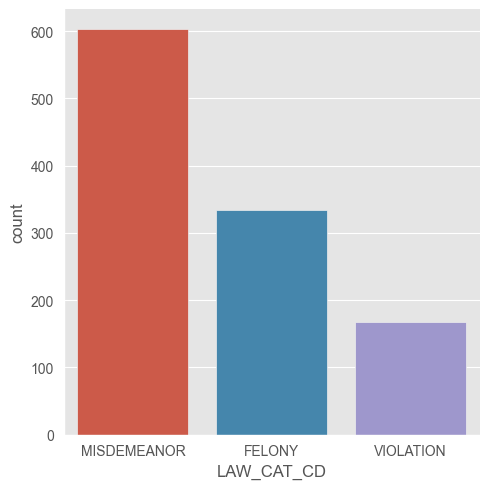

In [63]:
sb.catplot(x='LAW_CAT_CD', data=dataset, kind="count")

En principio, podemos notar que las cantidades están desbalanceadas, sin embargo, es algo de lo que nos preocuparemos más adelante. Por ahora, procederemos a realizar la limpieza de los datos, eliminando las columnas que no aportan información relevante para nuestro análisis y realizando la codificación de las variables categóricas.

Por las explicaciones de cada uno de los campos del dataset notemos. Primero, la columna CMPLNT_NUM no aporta información, pues es un simple ID generado aleatoriamente

In [64]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["CMPLNT_NUM"])
dataset

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,...,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,...,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,...,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,...,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,...,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,09/22/2016,15:00:00,NaN,NaN,09/30/2016,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,...,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,09/22/2016,14:50:00,09/22/2016,15:00:00,09/30/2016,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,...,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,09/22/2016,12:23:00,NaN,NaN,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,...,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,09/22/2016,11:40:00,09/22/2016,11:50:00,09/30/2016,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,...,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Las fechas de los crímenes no aportan información relevante para nuestro análisis, por lo que procederemos a eliminarlas

In [65]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["CMPLNT_FR_DT", "CMPLNT_TO_DT"])
dataset

,CMPLNT_FR_TM,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,23:25:00,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,...,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,23:16:00,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,23:00:00,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,...,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,23:00:00,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,...,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,23:00:00,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,...,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,15:00:00,NaN,09/30/2016,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,N.Y. POLICE DEPT,...,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,14:50:00,15:00:00,09/30/2016,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,FELONY,N.Y. POLICE DEPT,...,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,12:23:00,NaN,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,11:40:00,11:50:00,09/30/2016,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,DEPT OF CORRECTIONS,...,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


La hora de finalización representada en la columna "CMPLNT_TO_TM", a pesar de que pueda parecer relevante, es muy poco consistente, pues hay bastantes registros que no tienen dicha información (resulta representando un rango de hora tentativa), por lo que nos quedaremos solo con la hora inicial, que nos puede dar una idea más clara de la hora en la que ocurrió el crimen.

In [66]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["CMPLNT_TO_TM"])
dataset

,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,23:16:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,23:00:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,23:00:00,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,23:00:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,15:00:00,09/30/2016,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,14:50:00,09/30/2016,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,12:23:00,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,11:40:00,09/30/2016,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Nuevamente, la fecha en que se reportó el crimen no aporta información relevante para nuestro análisis, por lo que procederemos a eliminar dicha columna

In [67]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["RPT_DT"])
dataset

,CMPLNT_FR_TM,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,23:25:00,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,23:16:00,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,23:00:00,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,23:00:00,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,23:00:00,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,15:00:00,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,14:50:00,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,12:23:00,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,11:40:00,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Ahora, modificaremos la variable CMPLNT_FR_TM, que representa la hora en la que ocurrió el crimen a una forma delta que sea numérico

In [68]:
# Mapear variable categórica a numérica
dataset["CMPLNT_FR_TM"] = pd.to_timedelta(dataset["CMPLNT_FR_TM"]).dt.total_seconds().astype(int)
dataset

,CMPLNT_FR_TM,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Según parece, las variables de los códigos KY_CD y PD_CD son códigos de ofensas, que directamente determinan nuestro resultado, por lo que no sería ideal tenerlas en nuestro análisis. De momento, vamos a realizar el análisis eliminando estas columnas, y pasando las otras a numérico.

NOTA: Se tomó la decisión de eliminar los códigos KY_CD y PD_CD, ya que realizando el proceso teniendo en cuenta estas variables, se obtuvo un resultado de 100% de exactitud en tan solo dos pasos, lo cual resulta ser un resultado poco realista, por lo que se decidió eliminarlas, y trabajar con las descripciones de estos códigos (se dedujo que los códigos son una deducción de la combinación de las descripciones, si fue completado o no y de la clasificación que se le dió al mismo).

In [69]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["KY_CD", "PD_CD"])
dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,DANGEROUS WEAPONS,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,ROBBERY,"ROBBERY,PERSONAL ELECTRONIC DEVICE",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Pasamos las otras variables de tipo categórico a numérico, para poder trabajar con ellas

In [70]:
# Mapear variable categórica a numérica
label_encoder = preprocessing.LabelEncoder()
dataset['OFNS_DESC'] = label_encoder.fit_transform(dataset['OFNS_DESC'].astype(str))
dataset['PD_DESC'] = label_encoder.fit_transform(dataset['PD_DESC'].astype(str))

dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,7,123,COMPLETED,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,2,6,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,6,81,COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,7,122,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,13,36,COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,30,34,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,27,103,ATTEMPTED,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,4,25,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,8,5,COMPLETED,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Mapeamos la variable categórica CRM_ATPT_CPTD_CD a una variable numérica, que representa si el acto se cometió o no

In [71]:
print(dataset.groupby('CRM_ATPT_CPTD_CD').size())

CRM_ATPT_CPTD_CD
ATTEMPTED      20
COMPLETED    1084
dtype: int64


Son solo dos valores, lo cual nos permite mapearlos de manera sencilla

In [72]:
# Mapear variable categórica a numérica
dataset["CRM_ATPT_CPTD_CD"] = dataset["CRM_ATPT_CPTD_CD"].map({"COMPLETED": 1, "ATTEMPTED": 0})
dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,7,123,1,MISDEMEANOR,N.Y. TRANSIT POLICE,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,2,6,1,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,6,81,1,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,7,122,1,FELONY,N.Y. POLICE DEPT,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,13,36,1,VIOLATION,N.Y. POLICE DEPT,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,FELONY,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,27,103,0,FELONY,N.Y. POLICE DEPT,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,4,25,1,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,8,5,1,FELONY,DEPT OF CORRECTIONS,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


In [73]:
print(dataset.groupby('CRM_ATPT_CPTD_CD').size())

CRM_ATPT_CPTD_CD
0      20
1    1084
dtype: int64


Veamos ahora que tantas jurisdiscciones tenemos en nuestro dataset

In [74]:
print(dataset.groupby('JURIS_DESC').size())

JURIS_DESC
DEPT OF CORRECTIONS      4
HEALTH & HOSP CORP       1
N.Y. HOUSING POLICE     93
N.Y. POLICE DEPT       968
N.Y. TRANSIT POLICE     31
OTHER                    3
PORT AUTHORITY           4
dtype: int64


Son 7 jurisdicciones, que mapearemos a valores numéricos

In [75]:
# Mapear variable categórica a numérica
label_encoder = preprocessing.LabelEncoder()
dataset['JURIS_DESC'] = label_encoder.fit_transform(dataset['JURIS_DESC'].astype(str))

dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,7,123,1,MISDEMEANOR,4,BRONX,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,2,6,1,MISDEMEANOR,3,BROOKLYN,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,6,81,1,MISDEMEANOR,2,BRONX,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,7,122,1,FELONY,3,QUEENS,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,13,36,1,VIOLATION,3,QUEENS,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,FELONY,3,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,27,103,0,FELONY,3,BRONX,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,4,25,1,MISDEMEANOR,3,STATEN ISLAND,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,8,5,1,FELONY,0,BRONX,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


Hagamos un análisis similar para la variable BORO_NM, que describe el barrio en el que ocurrió el crimen

In [76]:
# Mapear variable categórica a numérica
label_encoder = preprocessing.LabelEncoder()
dataset['BORO_NM'] = label_encoder.fit_transform(dataset['BORO_NM'].astype(str))

dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,84300,7,123,1,MISDEMEANOR,4,0,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,83760,2,6,1,MISDEMEANOR,3,1,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,82800,6,81,1,MISDEMEANOR,2,0,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,82800,7,122,1,FELONY,3,3,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,82800,13,36,1,VIOLATION,3,3,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,FELONY,3,2,13,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,989866.0,208688.0,40.739483,-73.979736,"(40.73948342, -73.979735608)"
1100,53400,27,103,0,FELONY,3,0,48,FRONT OF,STREET,NaN,NaN,1018365.0,245729.0,40.841087,-73.876706,"(40.841086902, -73.876706351)"
1101,44580,4,25,1,MISDEMEANOR,3,4,122,NaN,OTHER,NaN,NaN,955614.0,145911.0,40.567130,-74.103070,"(40.567129817, -74.103070425)"
1102,42000,8,5,1,FELONY,0,0,41,INSIDE,OTHER,NaN,NaN,1016268.0,227533.0,40.791152,-73.884372,"(40.791151867, -73.884371919)"


In [77]:
print(dataset.groupby('BORO_NM').size())

BORO_NM
0    245
1    320
2    284
3    205
4     50
dtype: int64


Revisando las variables que nos quedan, que son variables netamente de direcciones, solo puede resultar relevante la variable PREM_TYP_DESC, que nos indica el tipo de local en el que ocurrió el crimen. Procederemos a mapearla a valores numéricos y a eliminar las demás columnas.

In [78]:
# Eliminar columnas no relevantes
dataset = dataset.drop(columns=["ADDR_PCT_CD", "LOC_OF_OCCUR_DESC", "PARKS_NM", "HADEVELOPT", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lat_Lon"])
dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC
0,84300,7,123,1,MISDEMEANOR,4,0,TRANSIT - NYC SUBWAY
1,83760,2,6,1,MISDEMEANOR,3,1,STREET
2,82800,6,81,1,MISDEMEANOR,2,0,RESIDENCE - PUBLIC HOUSING
3,82800,7,122,1,FELONY,3,3,STREET
4,82800,13,36,1,VIOLATION,3,3,STREET
...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,FELONY,3,2,RESIDENCE - APT. HOUSE
1100,53400,27,103,0,FELONY,3,0,STREET
1101,44580,4,25,1,MISDEMEANOR,3,4,OTHER
1102,42000,8,5,1,FELONY,0,0,OTHER


In [79]:
print(dataset.groupby('PREM_TYP_DESC').size())

PREM_TYP_DESC
ABANDONED BUILDING                2
AIRPORT TERMINAL                  3
BANK                              8
BAR/NIGHT CLUB                   10
BEAUTY & NAIL SALON               2
BRIDGE                            4
BUS (NYC TRANSIT)                 4
BUS (OTHER)                       1
BUS STOP                          2
BUS TERMINAL                      2
CANDY STORE                       2
CHAIN STORE                      30
CHECK CASHING BUSINESS            3
CHURCH                            2
CLOTHING/BOUTIQUE                 8
COMMERCIAL BUILDING              28
CONSTRUCTION SITE                 1
DEPARTMENT STORE                 26
DOCTOR/DENTIST OFFICE             4
DRUG STORE                       11
DRY CLEANER/LAUNDRY               2
FAST FOOD                         5
FOOD SUPERMARKET                  7
GAS STATION                       4
GROCERY/BODEGA                   17
GYM/FITNESS FACILITY              3
HIGHWAY/PARKWAY                   5
HOSPITAL      

In [80]:
# Mapear variable categórica a numérica
label_encoder = preprocessing.LabelEncoder()
dataset['PREM_TYP_DESC'] = label_encoder.fit_transform(dataset['PREM_TYP_DESC'].astype(str))

dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC
0,84300,7,123,1,MISDEMEANOR,4,0,52
1,83760,2,6,1,MISDEMEANOR,3,1,48
2,82800,6,81,1,MISDEMEANOR,2,0,40
3,82800,7,122,1,FELONY,3,3,48
4,82800,13,36,1,VIOLATION,3,3,48
...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,FELONY,3,2,39
1100,53400,27,103,0,FELONY,3,0,48
1101,44580,4,25,1,MISDEMEANOR,3,4,32
1102,42000,8,5,1,FELONY,0,0,32


In [81]:
print(dataset.groupby('PREM_TYP_DESC').size())

PREM_TYP_DESC
0       2
1       3
2       8
3      10
4       2
5       4
6       4
7       1
8       2
9       2
10      2
11     30
12      3
13      2
14      8
15     28
16      1
17     26
18      4
19     11
20      2
21      5
22      7
23      4
24     17
25      3
26      5
27      7
28      6
29      1
30      1
31      4
32     25
33      9
34      4
35      5
36      1
37      9
38     25
39    207
40     91
41    103
42     15
43      3
44      2
45      1
46      2
47      3
48    341
49      1
50      1
51      2
52     30
53      2
54      2
55      5
dtype: int64


Finalmente, haremos un mapeo de nuestra variable objetivo a variables numéricas, de la siguiente forma:
- Felony: 0
- Misdemeanor: 1
- Violation: 2

In [82]:
# Mapear variable categórica a numérica
dataset["LAW_CAT_CD"] = dataset["LAW_CAT_CD"].map({"FELONY": 0, "MISDEMEANOR": 1, "VIOLATION": 2})
dataset

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC
0,84300,7,123,1,1,4,0,52
1,83760,2,6,1,1,3,1,48
2,82800,6,81,1,1,2,0,40
3,82800,7,122,1,0,3,3,48
4,82800,13,36,1,2,3,3,48
...,...,...,...,...,...,...,...,...
1099,54000,30,34,1,0,3,2,39
1100,53400,27,103,0,0,3,0,48
1101,44580,4,25,1,1,3,4,32
1102,42000,8,5,1,0,0,0,32


Una vez tenemos los datos con los cuales queremos trabajar. Realicemos una visualización de los mismos, para tener una idea más clara de cómo se comportan.

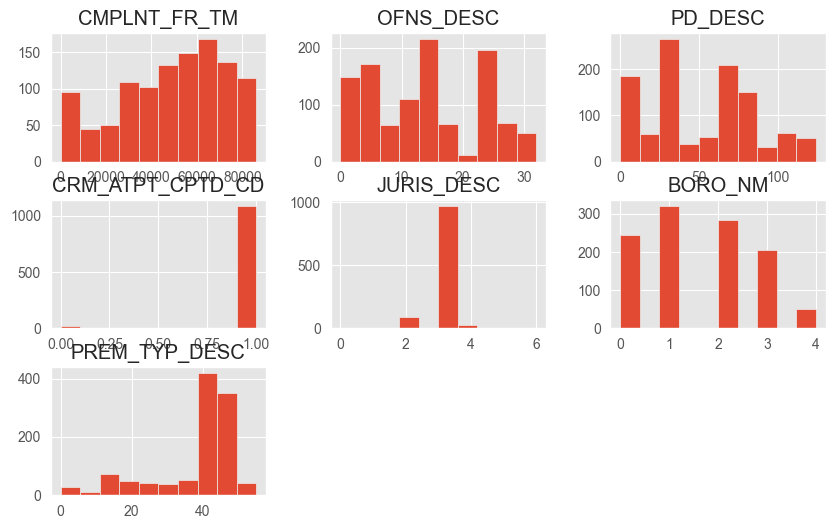

In [83]:
dataset_v2 = dataset.drop(['LAW_CAT_CD'], axis=1)
# Impresión de los histogramas
dataset_v2.hist()
plt.show()

In [84]:
# Características de los datos
dataset_v2.describe()

,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,49093.423913,13.907609,52.619565,0.981884,2.947464,1.542572,37.839674
std,23284.186640,8.991715,33.270591,0.133431,0.435248,1.156008,12.272319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33000.000000,6.000000,25.000000,1.000000,3.000000,1.000000,38.000000
50%,52800.000000,13.000000,52.000000,1.000000,3.000000,1.000000,40.000000
75%,67860.000000,24.000000,78.000000,1.000000,3.000000,2.000000,48.000000
max,86100.000000,32.000000,124.000000,1.000000,6.000000,4.000000,55.000000


Esta información de momento no nos brinda mucha información. Veamos ahora una comparación entre los datos involucrados y la variable objetivo.

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

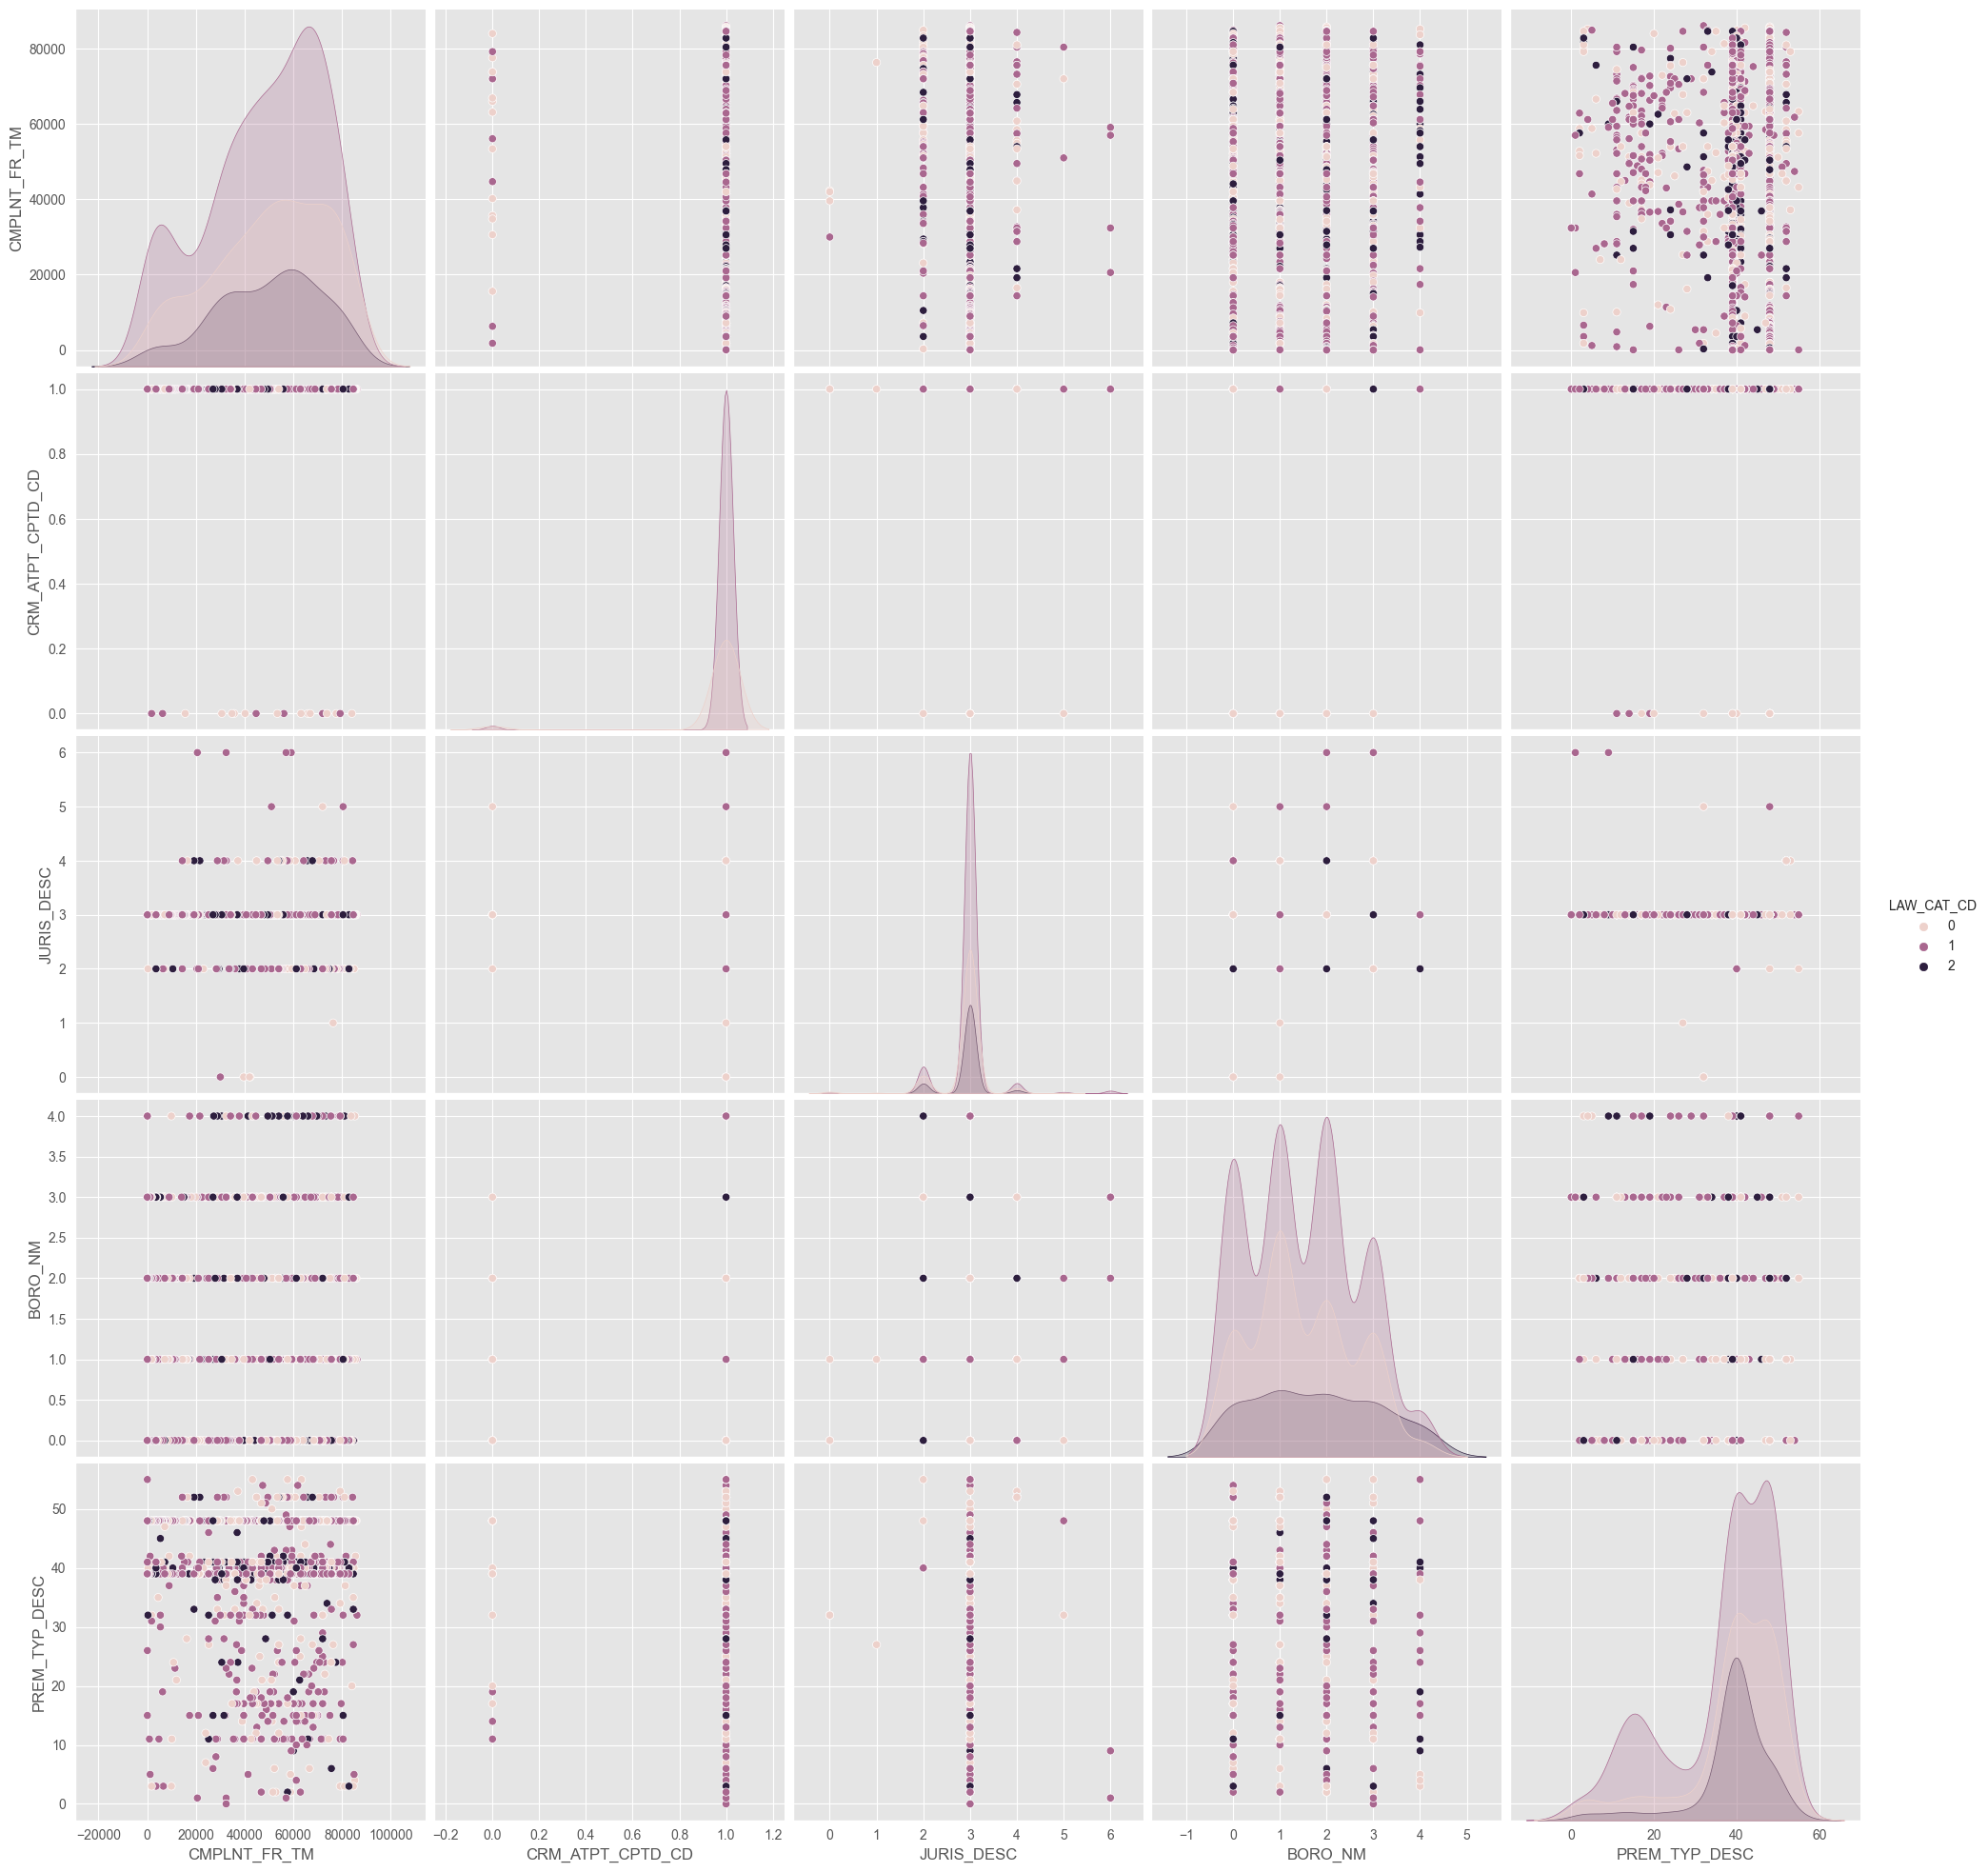

In [85]:
# Comparación de las variables con la variable objetivo
sb.pairplot(dataset, hue='LAW_CAT_CD', height=4, vars=["CMPLNT_FR_TM", "CRM_ATPT_CPTD_CD", "JURIS_DESC", "BORO_NM", "PREM_TYP_DESC"])

## Selección de características

### Gráfico de Pearson

<Axes: title={'center': 'Pearson Correlation of Features'}>

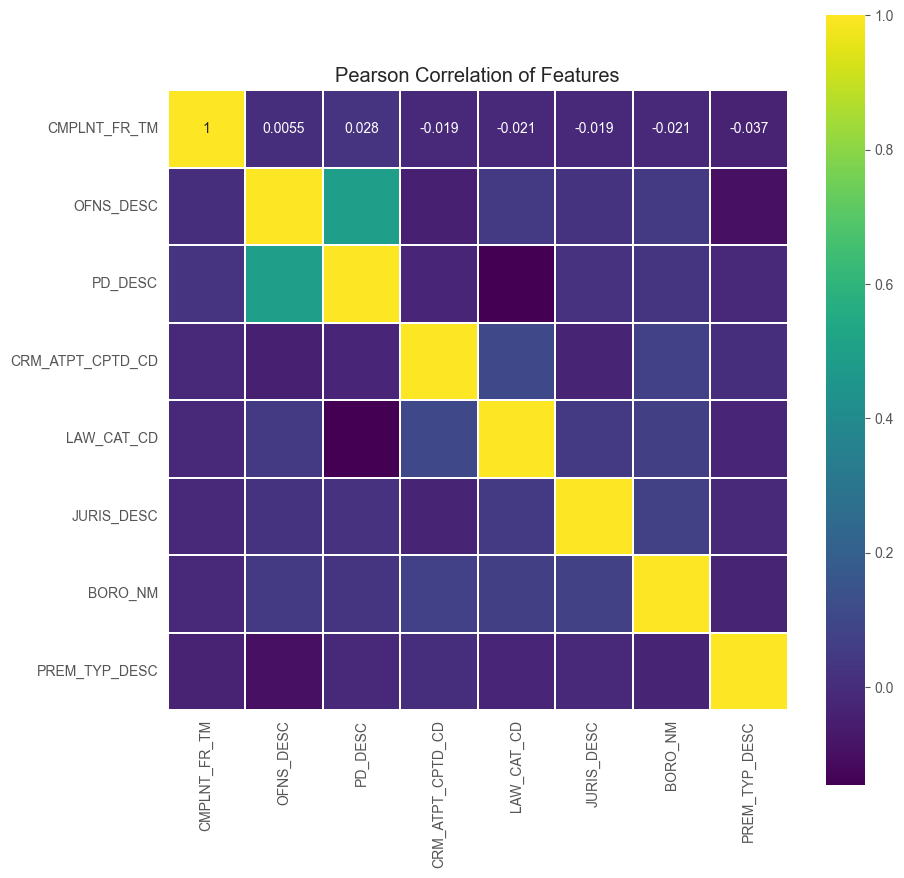

In [86]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sb.heatmap(dataset.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

### Gráfico de Cramer V

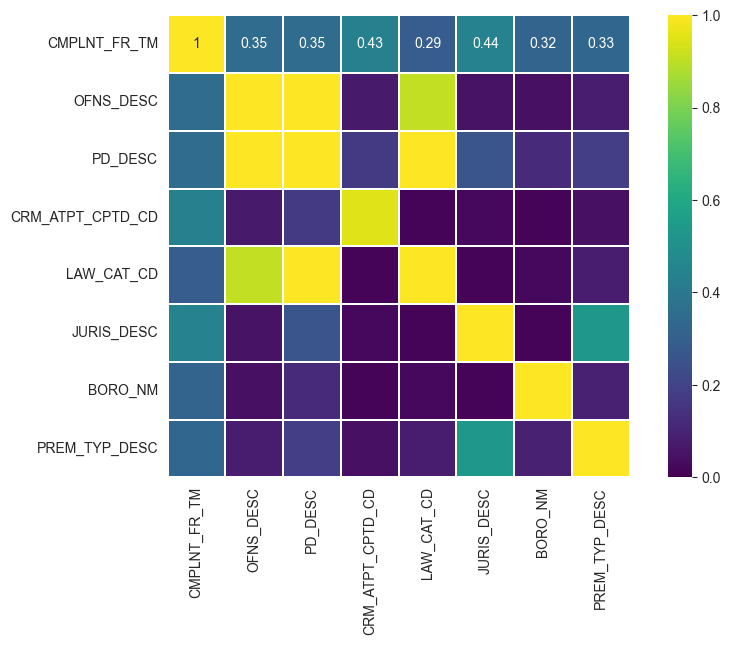

In [87]:
data_encoded = dataset.copy()
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
with sb.axes_style("white"):
  ax = sb.heatmap(df,
                  vmin=0.,
                  vmax=1,
                  cmap=colormap,
                  annot=True,
                  linewidths=0.1,
                  square=True)

plt.show()

### SelectKBest

In [88]:
#Todos los datos excepto la caracteristica objetivo.
dataset.dropna(inplace=True)

X = dataset.drop(['LAW_CAT_CD'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataset['LAW_CAT_CD']

In [89]:
# SelectKBest
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Obtener scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
scores = scores.sort_values('Score', ascending=False)

print("Importancia de características:")
print(scores)

Importancia de características:
            Feature      Score
2           PD_DESC  23.471207
1         OFNS_DESC   8.790406
3  CRM_ATPT_CPTD_CD   6.378473
5           BORO_NM   4.551939
6     PREM_TYP_DESC   4.401936
4        JURIS_DESC   3.763455
0      CMPLNT_FR_TM   1.184092


Como podemos ver, en este caso, la característica que define en una gran medida a nuestra variable objetivo es la variable KY_CD, que representa el código de la ofensa, con una diferencia increíble. Por otro lado, se puede decir que la variable PD_CD, que representa un código de ofensa más granular. El resto de características realmente tienen un puntaje demasiado bajo, por lo que apriori podríamos decir que serán casi que ignoradas en un futuro.

## Decisión entre Ginis y Entropía

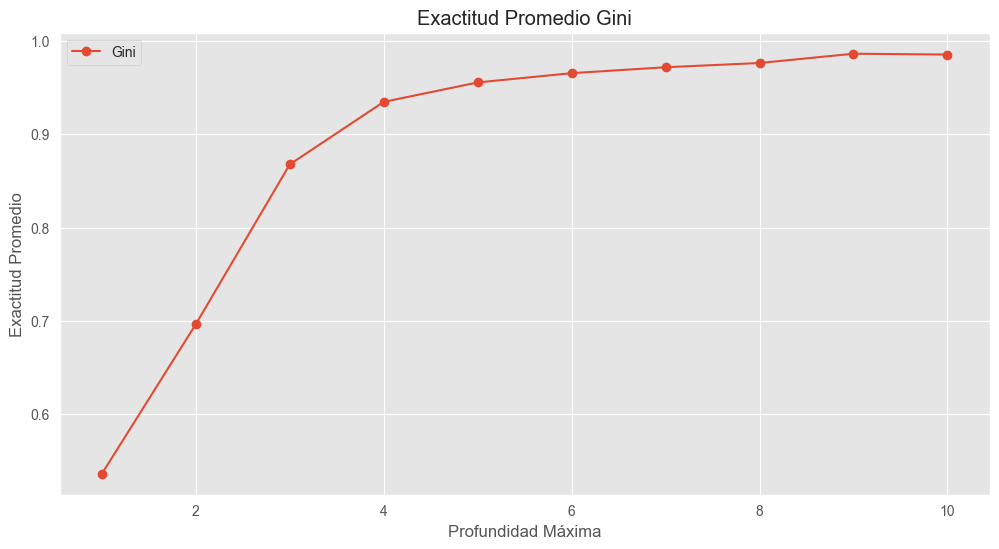

Gini:
Profundidad: 1, Exactitud Promedio: 0.5362
Profundidad: 2, Exactitud Promedio: 0.6965
Profundidad: 3, Exactitud Promedio: 0.8678
Profundidad: 4, Exactitud Promedio: 0.9348
Profundidad: 5, Exactitud Promedio: 0.9556
Profundidad: 6, Exactitud Promedio: 0.9656
Profundidad: 7, Exactitud Promedio: 0.9719
Profundidad: 8, Exactitud Promedio: 0.9765
Profundidad: 9, Exactitud Promedio: 0.9864
Profundidad: 10, Exactitud Promedio: 0.9855


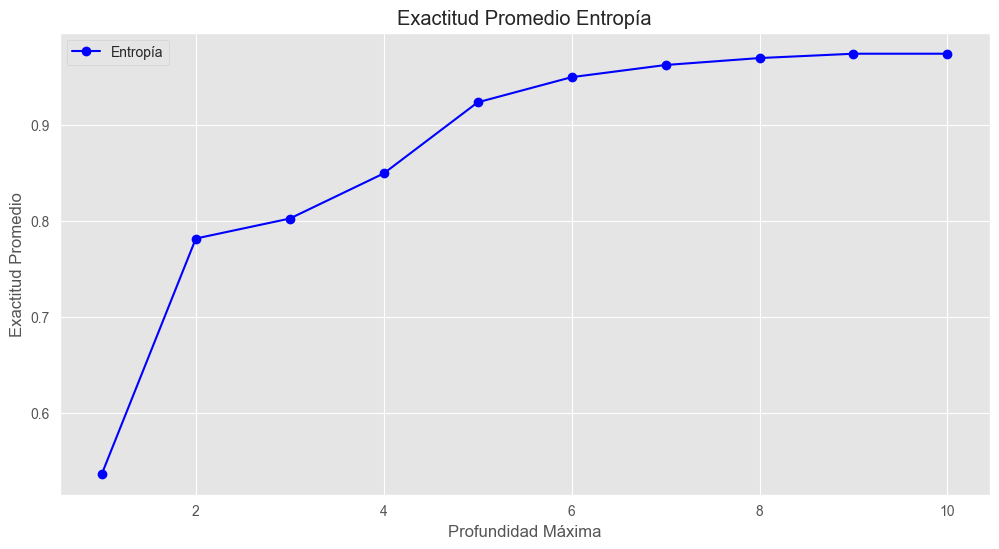

Entropía:
Profundidad: 1, Exactitud Promedio: 0.5362
Profundidad: 2, Exactitud Promedio: 0.7818
Profundidad: 3, Exactitud Promedio: 0.8026
Profundidad: 4, Exactitud Promedio: 0.8497
Profundidad: 5, Exactitud Promedio: 0.9239
Profundidad: 6, Exactitud Promedio: 0.9502
Profundidad: 7, Exactitud Promedio: 0.9629
Profundidad: 8, Exactitud Promedio: 0.9701
Profundidad: 9, Exactitud Promedio: 0.9747
Profundidad: 10, Exactitud Promedio: 0.9747

Mejor criterio: gini
Mejor profundidad: 9
Mejor exactitud: 0.9864


In [90]:
# Gini vs Entropy
criteria = ['gini', 'entropy']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_depths = range(1, 11)

results = {'gini': [], 'entropy': []}

for criterion in criteria:
    for depth in max_depths:
        scores = []
        for train_idx, val_idx in cv.split(X, y):
            X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            
            clf = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=depth,
                random_state=42
            )
            clf.fit(X_train_cv, y_train_cv)
            score = clf.score(X_val_cv, y_val_cv)
            scores.append(score)
        
        results[criterion].append(np.mean(scores))

# Visualización Gini
plt.figure(figsize=(12, 6))
plt.plot(max_depths, results['gini'], marker='o', label='Gini')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio Gini')
plt.legend()
plt.grid(True)
plt.show()

# Resultados Gini
print("Gini:")
for depth, score in zip(max_depths, results['gini']):
    print(f"Profundidad: {depth}, Exactitud Promedio: {score:.4f}")

# Visualización Entropía
plt.figure(figsize=(12, 6))
plt.plot(max_depths, results['entropy'], marker='o', label='Entropía', color='blue')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio Entropía')
plt.legend()
plt.grid(True)
plt.show()

# Resultados Entropía
print("Entropía:")
for depth, score in zip(max_depths, results['entropy']):
    print(f"Profundidad: {depth}, Exactitud Promedio: {score:.4f}")

# Determinar el mejor criterio y profundidad
best_criterion = max(results.items(), key=lambda x: max(x[1]))[0]
best_depth = max_depths[np.argmax(results[best_criterion])]

print(f"\nMejor criterio: {best_criterion}")
print(f"Mejor profundidad: {best_depth}")
print(f"Mejor exactitud: {max(results[best_criterion]):.4f}")

Por lo que podemos ver, ambos criterios resultan ser bastante parecidos en sus resultados. Sin embargo, el que mejor resultado obtuvo fue Gini, con una profundidad de 9 y con una exactitud casi perfecta. Por lo que procederemos a entrenar nuestro modelo con estos parámetros.

## Entrenamiento del modelo

In [91]:
# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creación y entrenamiento del modelo con los mejores parámetros
clf = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_depth,
    random_state=42,
    class_weight='balanced'  # Balanceo automático de clases
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=42)

Visualicemos el árbol de decisión

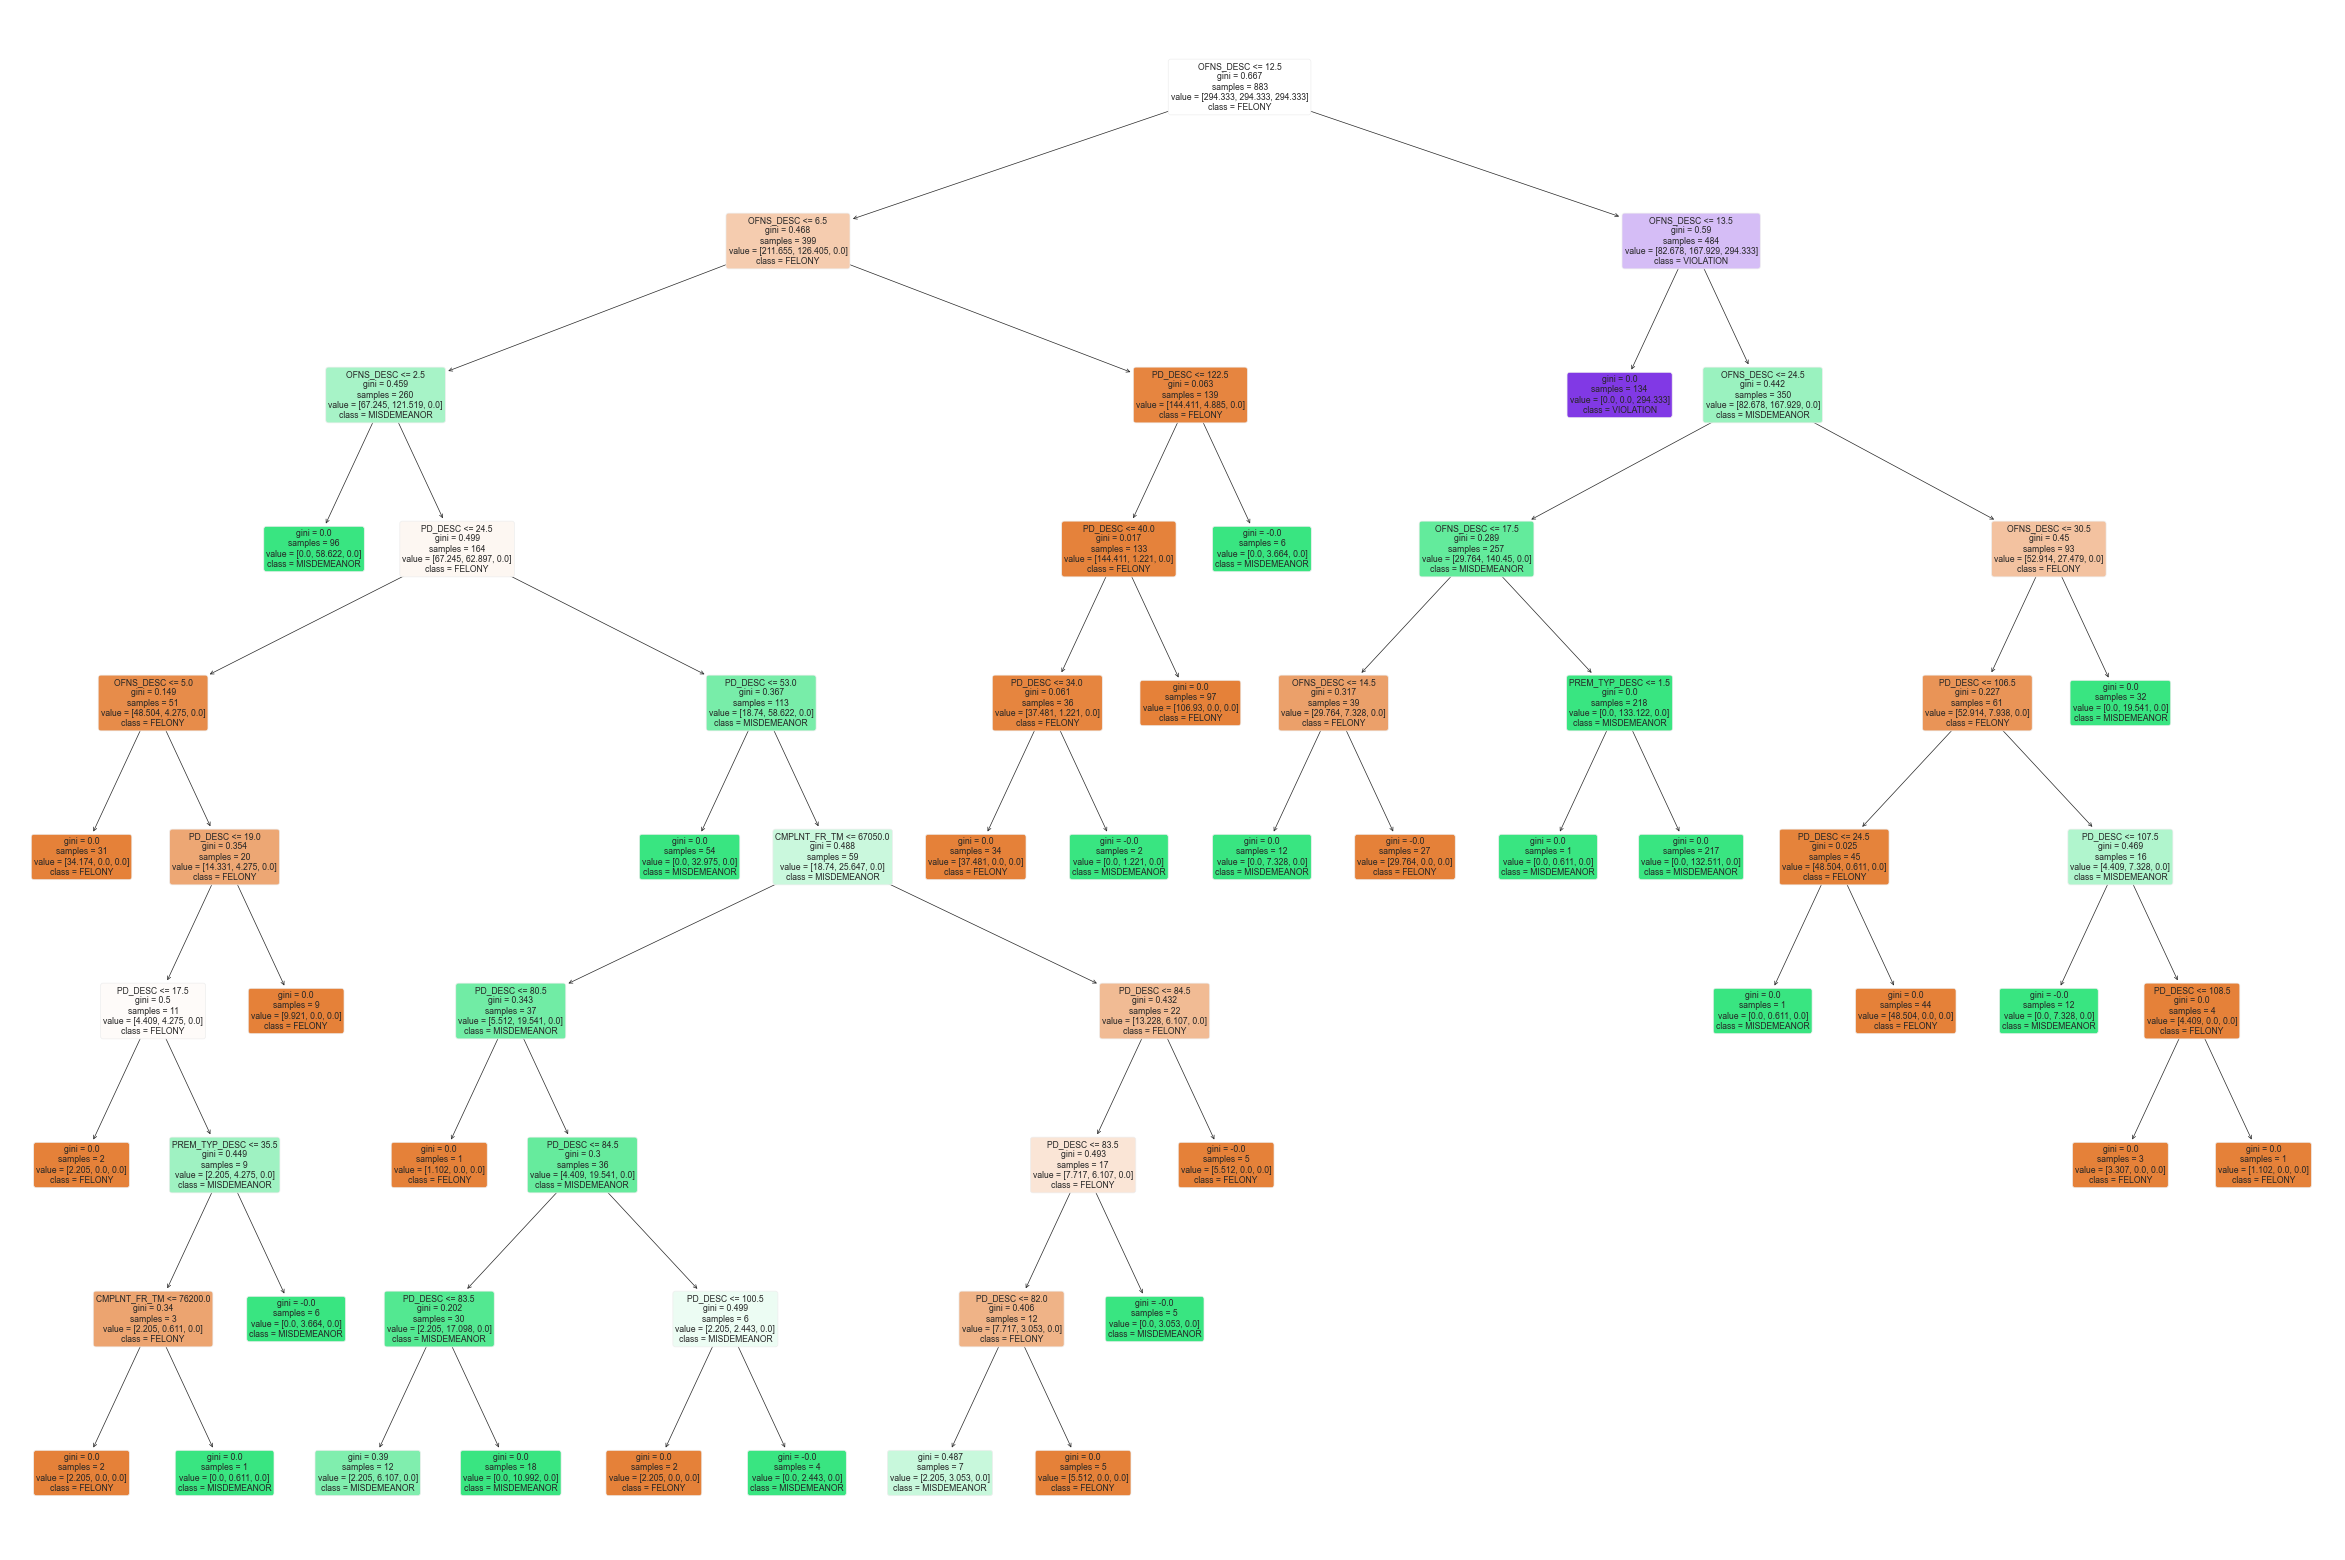

In [92]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))
plot_tree(clf, 
          feature_names=X.columns.tolist(), 
          class_names=['FELONY', 'MISDEMEANOR', 'VIOLATION'], 
          filled=True, 
          rounded=True)
plt.show()

## Matriz de confusión

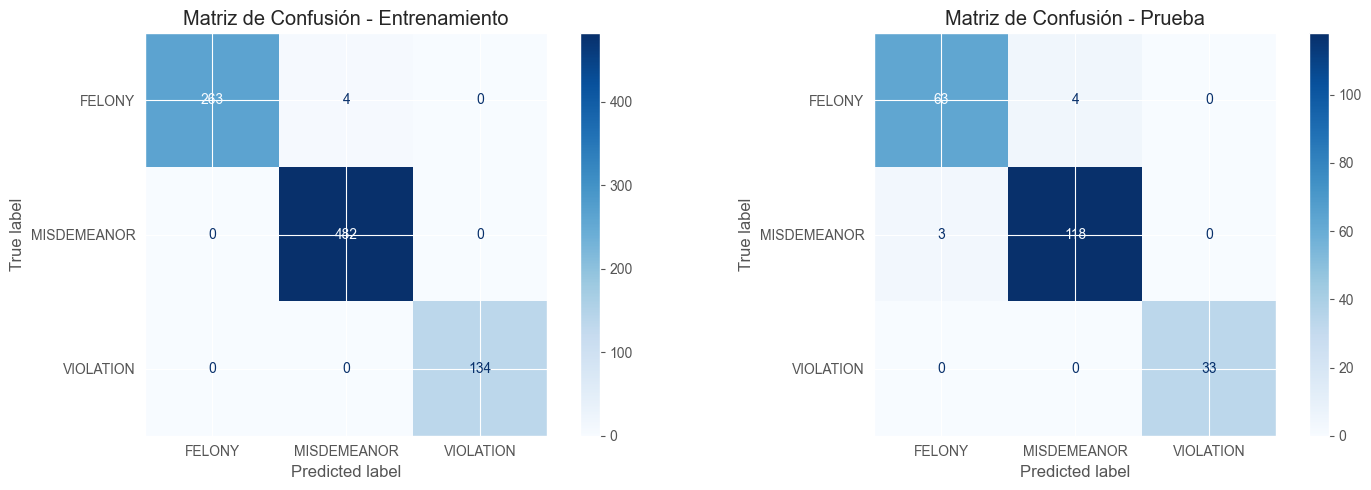

In [93]:
# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Matriz de confusión - Entrenamiento
ConfusionMatrixDisplay.from_estimator(
    clf, X_train, y_train,
    display_labels=['FELONY', 'MISDEMEANOR', 'VIOLATION'],
    cmap=plt.cm.Blues,
    ax=ax1
)
ax1.set_title('Matriz de Confusión - Entrenamiento')

# Matriz de confusión - Prueba
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test,
    display_labels=['FELONY', 'MISDEMEANOR', 'VIOLATION'],
    cmap=plt.cm.Blues,
    ax=ax2
)
ax2.set_title('Matriz de Confusión - Prueba')

plt.tight_layout()
plt.show()

## Métricas de evaluación

In [94]:
# Predicciones
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Métricas de rendimiento
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Exactitud en prueba: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test, target_names=['FELONY', 'MISDEMEANOR', 'VIOLATION']))

Exactitud en entrenamiento: 1.00
Exactitud en prueba: 0.97

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

      FELONY       0.95      0.94      0.95        67
 MISDEMEANOR       0.97      0.98      0.97       121
   VIOLATION       1.00      1.00      1.00        33

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221


## Importancia de las características

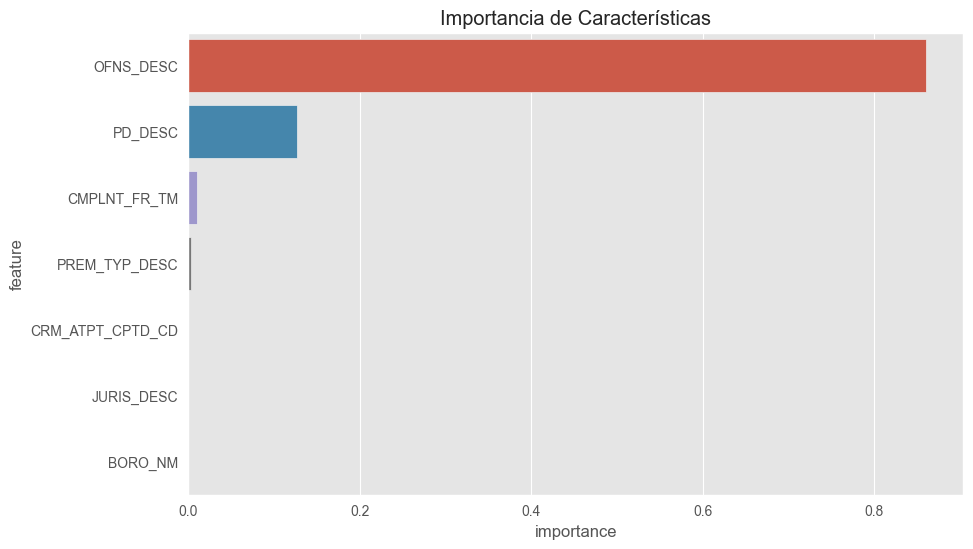

In [95]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='importance', y='feature', data=importances)
plt.title('Importancia de Características')
plt.show()

## Conclusiones

Como pudimos ver, el árbol de decisión tiene en cuenta en su mayoría 2 características para realizar la clasificación objetiva, es decir, del tipo y/o nivel de agresión que tenemos y estas se basan en la descripción de la ofensa en general. Además de esto, como podemos ver en el árbol y confirmar en los resultados obtenidos, la clasificación del tipo "Violation" tiene una exactitud perfecta, pues en el árbol de decisión, solamente en un punto se tiene esta y se puede deducir, revisando los datos que es dado a que una sola descripción es considerada de este tipo (también debido a las conocidas censuras que describe el documento hacia este tipo de ofensas). Por otro lado, las ofensas de los otros dos tipos resultan tener también gran exactitud, aunque no perfecta, lo cual es un resultado bastante bueno.

Por otro lado, pudimos ver como, a pesar de que los resultados mediante los métodos de Gini y de Entropía son bastante similares, Gini destaca en este caso, logrando un resultado un poco mejor, al lograr resultados más rápidamente, como pudimos ver en los gráficos en que tomábamos la decisión entre estos dos métodos y la profundidad de los mismos. En cuanto a la decisión de la profundidad, en este caso tomamos la más alta, aunque se tendría que validar para aplicaciones futuras si esta es la mejor decisión, pues son bastantes más pasos contra mejoras un poco más pequeñas.